## Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

np.random.seed(1234)
tf.random.set_seed(1234)
plt.rcParams["font.family"] = "serif"

2024-10-21 10:21:50.089035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-21 10:21:50.647785: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/azharctp/miniconda3/envs/tf/lib/
2024-10-21 10:21:50.652279: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/azharctp/miniconda3/envs/tf/lib/
2024-10-21 10:21:50.652289: W tensorflow/compiler/

## Load data for post processing

In [8]:
act_disc_model = tf.keras.models.load_model('Saved_model')

angles = np.linspace(-30,30,1001)

D = 30.1
for i in [2.5*D,5.5*D,8*D]:
    X,Y,Z = np.meshgrid(np.array([i]),np.tan(angles*np.pi/180)*i,np.array([35]))
    test_data = np.hstack((X.flatten()[:, None], Y.flatten()[:, None], Z.flatten()[:, None]))
    test_data = tf.cast(test_data,tf.float32)
    if i==2.5*D:
        PINN_2_5D = act_disc_model.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])
    elif i==5.5*D:
        PINN_5_5D = act_disc_model.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])
    else:
        PINN_8D = act_disc_model.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])


32/32 [==============================] - 0s 1ms/step


In [3]:
#Velocity data
data_25D_nibe = pd.read_csv('Data/Velocity/25D.csv')
data_55D_nibe = pd.read_csv('Data/Velocity/55D.csv')
data_8D_nibe = pd.read_csv('Data/Velocity/8D.csv')
theta_kw_25D,kw_25D,theta_ke_25D,ke_25D,theta_sst_25D,sst_25D,theta_rsm_25D,rsm_25D,theta_data_25D,data_25D = data_25D_nibe['theta_kw'],data_25D_nibe['kw'],data_25D_nibe['theta_ke'],data_25D_nibe['ke'],data_25D_nibe['theta_sst'],data_25D_nibe['sst'],data_25D_nibe['theta_rsm'],data_25D_nibe['rsm'],data_25D_nibe['theta_data'],data_25D_nibe['data']
theta_kw_55D,kw_55D,theta_ke_55D,ke_55D,theta_sst_55D,sst_55D,theta_rsm_55D,rsm_55D,theta_data_55D,data_55D = data_55D_nibe['theta_kw'],data_55D_nibe['kw'],data_55D_nibe['theta_ke'],data_55D_nibe['ke'],data_55D_nibe['theta_sst'],data_55D_nibe['sst'],data_55D_nibe['theta_rsm'],data_55D_nibe['rsm'],data_55D_nibe['theta_data'],data_55D_nibe['data']
theta_kw_8D,kw_8D,theta_ke_8D,ke_8D,theta_sst_8D,sst_8D,theta_rsm_8D,rsm_8D,theta_data_8D,data_8D = data_8D_nibe['theta_kw'],data_8D_nibe['kw'],data_8D_nibe['theta_ke'],data_8D_nibe['ke'],data_8D_nibe['theta_sst'],data_8D_nibe['sst'],data_8D_nibe['theta_rsm'],data_8D_nibe['rsm'],data_8D_nibe['theta_data'],data_8D_nibe['data']

In [4]:
#TKE
data_25DK_nibe = pd.read_csv('Data/TKE/25DK.csv')
data_55DK_nibe = pd.read_csv('Data/TKE/55DK.csv')
data_8DK_nibe = pd.read_csv('Data/TKE/8DK.csv')
theta_kw_25DK,kw_25DK,theta_ke_25DK,ke_25DK,theta_sst_25DK,sst_25DK,theta_rsm_25DK,rsm_25DK,theta_data_25DK,data_25DK = data_25DK_nibe['theta_kw'],data_25DK_nibe['kw'],data_25DK_nibe['theta_ke'],data_25DK_nibe['ke'],data_25DK_nibe['theta_sst'],data_25DK_nibe['sst'],data_25DK_nibe['theta_rsm'],data_25DK_nibe['rsm'],data_25DK_nibe['theta_data'],data_25DK_nibe['data']
theta_kw_55DK,kw_55DK,theta_ke_55DK,ke_55DK,theta_sst_55DK,sst_55DK,theta_rsm_55DK,rsm_55DK,theta_data_55DK,data_55DK = data_55DK_nibe['theta_kw'],data_55DK_nibe['kw'],data_55DK_nibe['theta_ke'],data_55DK_nibe['ke'],data_55DK_nibe['theta_sst'],data_55DK_nibe['sst'],data_55DK_nibe['theta_rsm'],data_55DK_nibe['rsm'],data_55DK_nibe['theta_data'],data_55DK_nibe['data']
theta_kw_8DK,kw_8DK,theta_ke_8DK,ke_8DK,theta_sst_8DK,sst_8DK,theta_rsm_8DK,rsm_8DK,theta_data_8DK,data_8DK = data_8DK_nibe['theta_kw'],data_8DK_nibe['kw'],data_8DK_nibe['theta_ke'],data_8DK_nibe['ke'],data_8DK_nibe['theta_sst'],data_8DK_nibe['sst'],data_8DK_nibe['theta_rsm'],data_8DK_nibe['rsm'],data_8DK_nibe['theta_data'],data_8DK_nibe['data']

In [9]:
u_2_5D = np.sqrt(np.square(PINN_2_5D[0])+np.square(PINN_2_5D[1])+np.square(PINN_2_5D[2]))
u_5_5D = np.sqrt(np.square(PINN_5_5D[0])+np.square(PINN_5_5D[1])+np.square(PINN_5_5D[2]))
u_8D = np.sqrt(np.square(PINN_8D[0])+np.square(PINN_8D[1])+np.square(PINN_8D[2]))

TKE_2_5D = PINN_2_5D[4]/(10**2)
TKE_5_5D = PINN_5_5D[4]/(10**2)
TKE_8D = PINN_8D[4]/(10**2)

# Velocity Plots

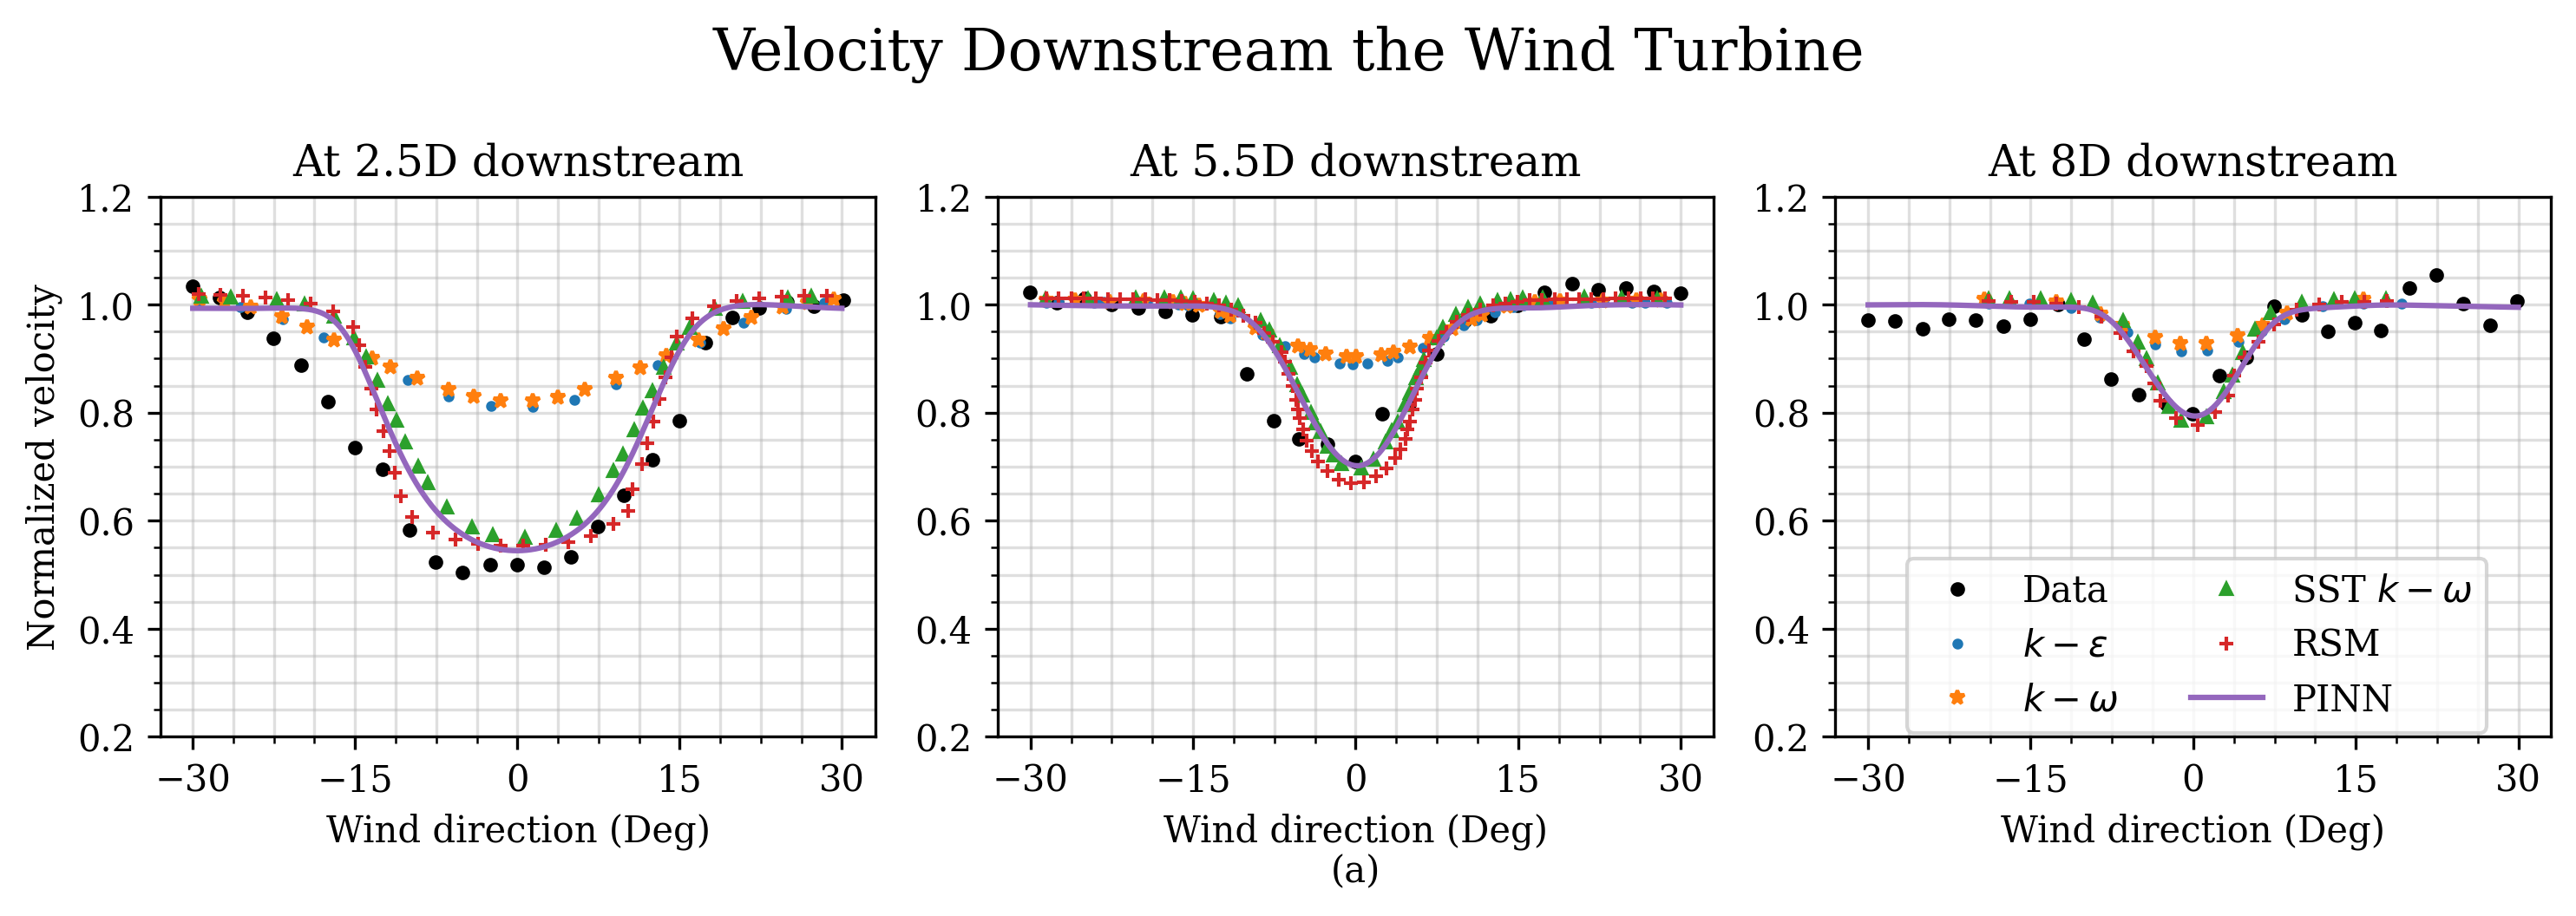

In [10]:
fig, ax = plt.subplots(1, 3, sharex='col',figsize=(10,3.75),dpi=300)

ax[0].plot(theta_data_25D,data_25D,'.k',label = 'Data')
ax[0].plot(theta_ke_25D,ke_25D,'o',markersize=2,alpha=1,markevery=2,label = r'$k-\epsilon$')
ax[0].plot(theta_kw_25D,kw_25D,'*',markersize=4,alpha=1,markevery=2,label = r'$k-\omega$')
ax[0].plot(theta_sst_25D,sst_25D,'^',markersize=3,alpha=1,markevery=2,label = r'SST $k-\omega$')
ax[0].plot(theta_rsm_25D,rsm_25D,'+',markersize=4,alpha=1,markevery=2,label = r'RSM')
ax[0].plot(angles, u_2_5D/max(u_2_5D), label = 'PINN')

ax[0].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[0].set_title(r'At 2.5D downstream')
ax[0].set_ylabel(r'Normalized velocity')
ax[0].set_ylim([.2,1.2])
ax[0].grid(which='both',alpha=0.4)
ax[0].minorticks_on()
ax[0].set_xticks(np.linspace(-30,30,5))

ax[1].plot(theta_data_55D,data_55D,'.k')
ax[1].plot(theta_ke_55D,ke_55D, 'o',markersize=2,alpha=1,markevery=2)
ax[1].plot(theta_kw_55D,kw_55D,'*',markersize=4,alpha=1,markevery=2)
ax[1].plot(theta_sst_55D,sst_55D,'^',markersize=3,alpha=1,markevery=2)
ax[1].plot(theta_rsm_55D,rsm_55D,'+',markersize=4,alpha=1,markevery=2)
ax[1].plot(angles, u_5_5D/max(u_5_5D))

ax[1].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[1].set_title(r'At 5.5D downstream')
ax[1].set_ylim([.2,1.2])
ax[1].grid(which='both',alpha=0.4)
ax[1].minorticks_on()
ax[1].set_xticks(np.linspace(-30,30,5))


ax[2].plot(theta_data_8D,data_8D,'.k')
ax[2].plot(theta_ke_8D,ke_8D,'o',markersize=2,alpha=1,markevery=2)
ax[2].plot(theta_kw_8D,kw_8D,'*',markersize=4,alpha=1,markevery=2)
ax[2].plot(theta_sst_8D,sst_8D,'^',markersize=3,alpha=1,markevery=2)
ax[2].plot(theta_rsm_8D,rsm_8D,'+',markersize=4,alpha=1,markevery=2)
ax[2].plot(angles, u_8D/max(u_8D))

ax[2].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[2].set_title(r'At 8D downstream')
ax[2].set_ylim([.2,1.2])
ax[2].grid(which='both',alpha=0.4)
ax[2].minorticks_on()
ax[2].set_xticks(np.linspace(-30,30,5))

ax[1].text(0.5, -0.25, '(a)', horizontalalignment='center',
     verticalalignment='center', transform=ax[1].transAxes)


fig.legend(loc=(0.74,0.2),ncol=2)
fig.suptitle(fr"Velocity Downstream the Wind Turbine", fontsize=16)
fig.tight_layout()
plt.savefig(f'Plots/Sexbierum_Velocity.png',dpi=300)

# Turbulence Intensity Plots

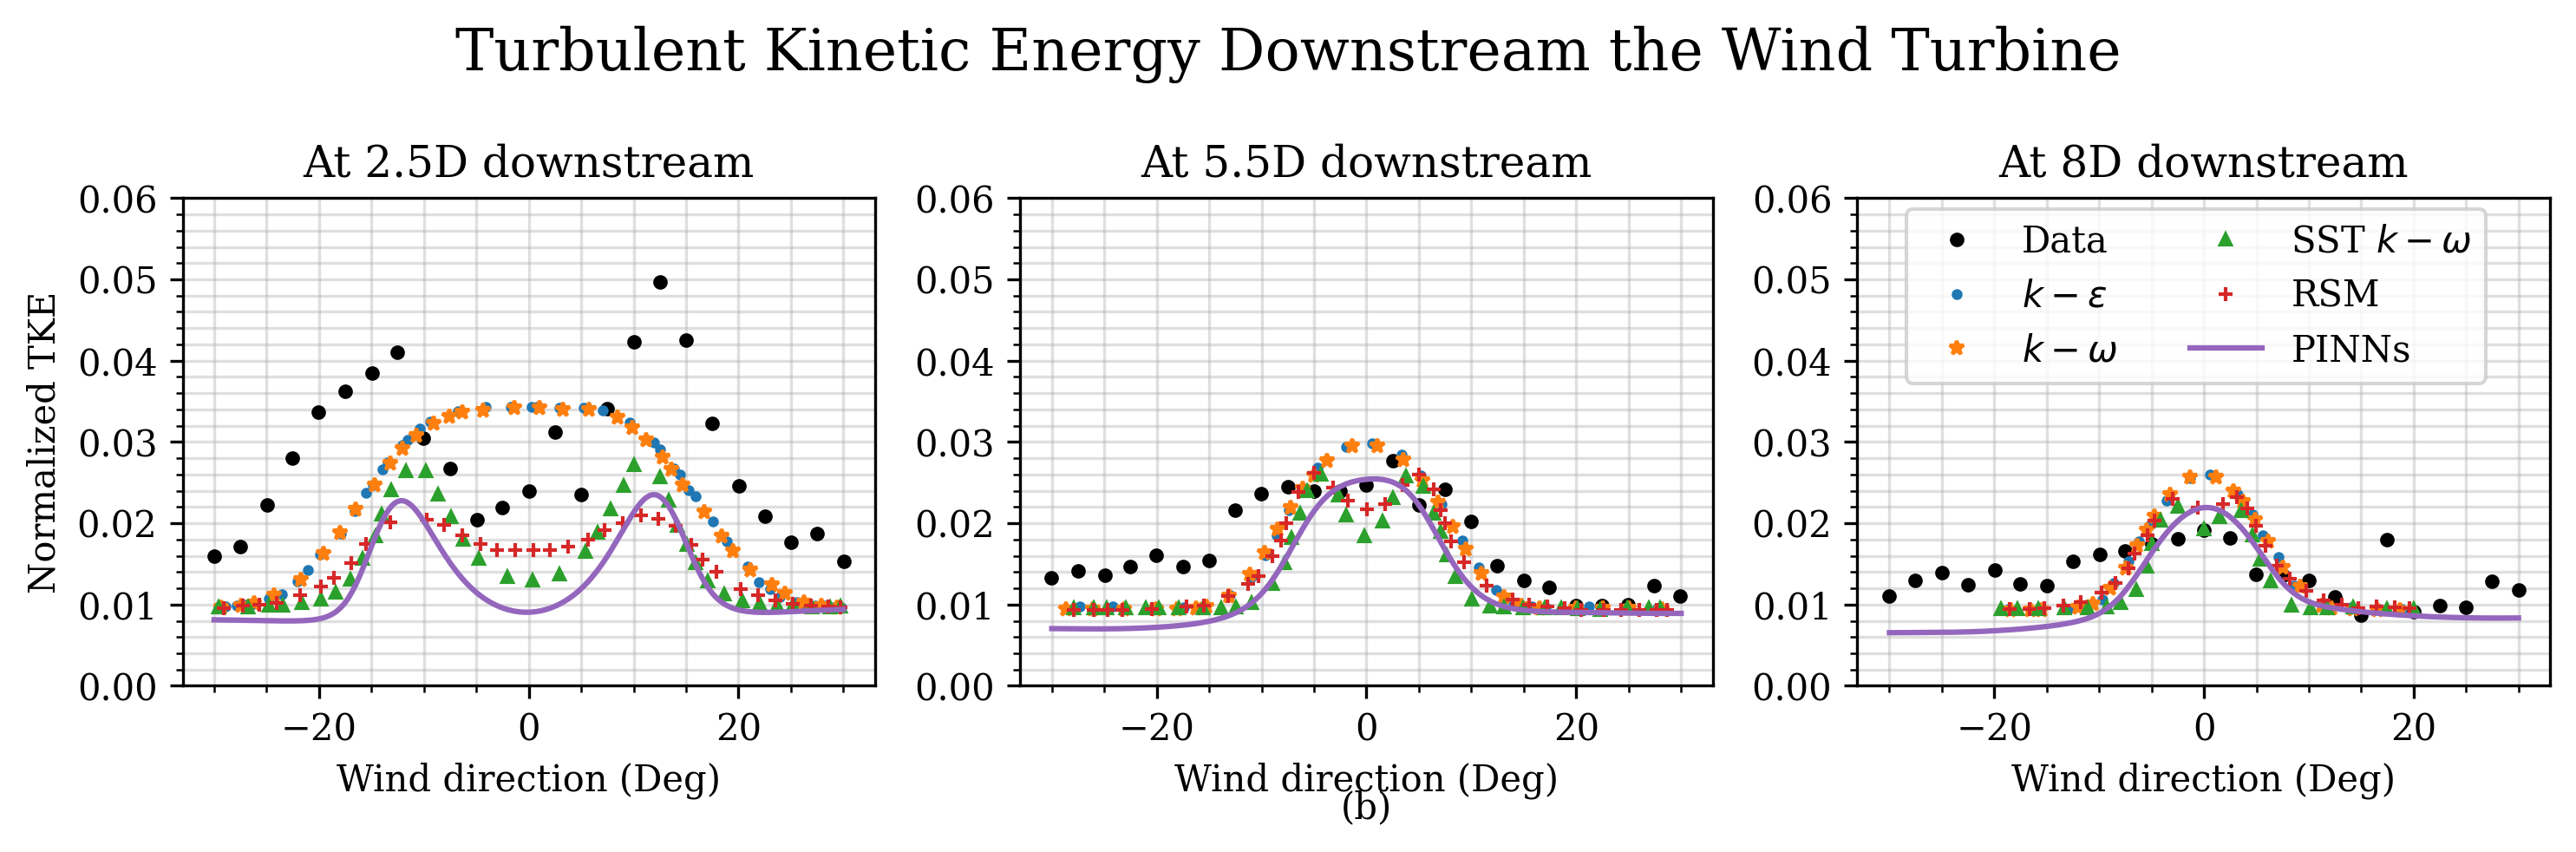

In [11]:
fig, ax = plt.subplots(1, 3, sharex='col',figsize=(10,3.5), dpi=300)

ax[0].plot(theta_data_25DK,data_25DK,'.k',label = 'Data')
ax[0].plot(theta_ke_25DK,ke_25DK,'o',markersize=2,alpha=1,markevery=1,label = r'$k-\epsilon$')
ax[0].plot(theta_kw_25DK,kw_25DK,'*',markersize=4,alpha=1,markevery=1,label = r'$k-\omega$')
ax[0].plot(theta_sst_25DK,sst_25DK,'^',markersize=3,alpha=1,markevery=1,label = r'SST $k-\omega$')
ax[0].plot(theta_rsm_25DK,rsm_25DK,'+',markersize=4,alpha=1,markevery=1,label = r'RSM')
ax[0].plot(angles, TKE_2_5D , label = 'PINNs')

ax[0].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[0].set_title(r'At 2.5D downstream')
ax[0].set_ylabel(r'Normalized TKE')
ax[0].set_ylim([.0,.06])
ax[0].grid(which='both',alpha=0.4)
ax[0].minorticks_on()

ax[1].plot(theta_data_55DK,data_55DK,'.k')
ax[1].plot(theta_ke_55DK,ke_55DK,'o',markersize=2,alpha=1,markevery=1)
ax[1].plot(theta_kw_55DK,kw_55DK,'*',markersize=4,alpha=1,markevery=1)
ax[1].plot(theta_sst_55DK,sst_55DK,'^',markersize=3,alpha=1,markevery=1)
ax[1].plot(theta_rsm_55DK,rsm_55DK,'+',markersize=4,alpha=1,markevery=1)
ax[1].plot(angles, TKE_5_5D )

ax[1].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[1].set_title(r'At 5.5D downstream')
ax[1].set_ylim([.0,.06])
ax[1].grid(which='both',alpha=0.4)
ax[1].minorticks_on()

ax[2].plot(theta_data_8DK,data_8DK,'.k')
ax[2].plot(theta_ke_8DK,ke_8DK,'o',markersize=2,alpha=1,markevery=1)
ax[2].plot(theta_kw_8DK,kw_8DK,'*',markersize=4,alpha=1,markevery=1)
ax[2].plot(theta_sst_8DK,sst_8DK,'^',markersize=3,alpha=1,markevery=1)
ax[2].plot(theta_rsm_8DK,rsm_8DK,'+',markersize=4,alpha=1,markevery=1)
ax[2].plot(angles, TKE_8D )

ax[2].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[2].set_title(r'At 8D downstream')
ax[2].set_ylim([.0,.06])
ax[2].grid(which='both',alpha=0.4)
ax[2].minorticks_on()


ax[1].text(0.5, -0.25, '(b)', horizontalalignment='center',
     verticalalignment='center', transform=ax[1].transAxes)

fig.legend(loc = (0.74,0.55),ncol=2)
fig.suptitle(fr"Turbulent Kinetic Energy Downstream the Wind Turbine", fontsize=16)
fig.tight_layout()

plt.savefig(f'Plots/Sexbierum_TKE.png',dpi=300)

# Contour Plot Data
Contour plots are generated using ParaView with the data saved in 'Sexbierum_contour_data.csv'

In [12]:
x_grid = 500
y_grid= 200
Radius = 15.05
XX,YY,ZZ = np.meshgrid(np.linspace(-10 * Radius, 25 * Radius,500),np.linspace(-10 * Radius, 10 * Radius,200),np.array([35]))
test_data = [XX.flatten()[:, None], YY.flatten()[:, None], ZZ.flatten()[:, None]]
u,v,w,p,k,eps = act_disc_model.predict(test_data)

3125/3125 [==============================] - 4s 1ms/step


In [13]:
dict = {'x': XX.flatten().tolist(), 'y': YY.flatten().tolist(), 'z': ZZ.flatten().tolist(),
                'u': u.flatten()[:,].tolist(), 'v': v.flatten()[:,].tolist(), 'w': w.flatten()[:,].tolist(),
                  'p': p.flatten()[:,].tolist(), 'k': k.flatten()[:,].tolist(), 'eps': eps.flatten()[:,].tolist()}

df = pd.DataFrame(dict)

df.to_csv(f'Sexbierum_contour_data.csv')